In [174]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [176]:
import plotly.express as px

In [177]:
df = pd.read_csv('Salary_Data.csv')

In [178]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Pre-Processing

In [179]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [180]:
df.shape

(6704, 6)

In [181]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [182]:
## very little nulls so we will just drop them
df = df.dropna()

In [183]:
df = df[df.Gender != 'Other']

In [184]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [185]:
## change data types to relevant types
df = df.astype({'Age':'int'})
df = df.astype({'Gender':'str'})
df = df.astype({'Education Level':'str'})
df = df.astype({'Job Title':'str'})
df = df.astype({'Years of Experience':'str'})
df = df.astype({'Salary':'int'})

In [186]:
## rename columns
df.rename({'Education Level': 'Education', 'Job Title': 'Occupation'}, axis=1, inplace=True)
df.rename({'Years of Experience': 'Experience', 'Gender': 'Sex'}, axis=1, inplace=True)

In [187]:
df.describe()
## min and max has a HUGE gap here

,Age,Salary
count,6684.000000,6684.000000
mean,33.610563,115307.175194
std,7.595994,52806.810881
min,21.000000,350.000000
25%,28.000000,70000.000000
50%,32.000000,115000.000000
75%,38.000000,160000.000000
max,62.000000,250000.000000


In [135]:
## saving for exp2
df_exp2 = df

## saving for exp3
df_exp3 = df

In [91]:
df_exp2 = pd.get_dummies(df, columns=['Education'], drop_first=False)

# Data Understanding/Visuals

In [92]:
df_dum = pd.get_dummies(df, columns=['Education', 'Sex'], drop_first=False)

/var/folders/6z/4s30_5h12pjb4trc30n55nzc0000gn/T/ipykernel_20916/4215852158.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Heatmap of Relations')

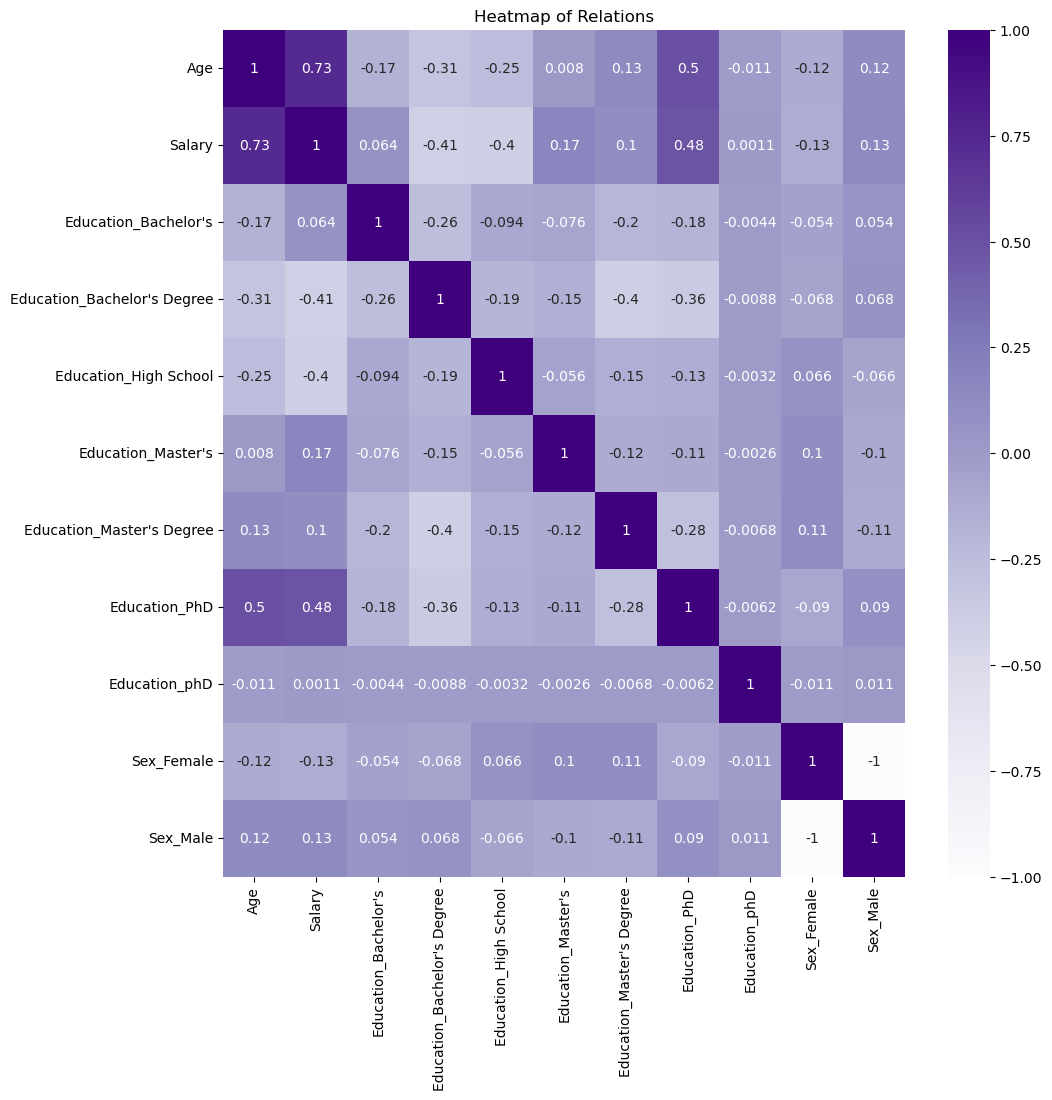

In [93]:
plt.figure(figsize = (11,11))
sns.heatmap(df_dum.corr(),annot=True , cmap ='Purples' )
plt.title("Heatmap of Relations")

In [94]:
x = df['Age']
y = df['Salary']
fig = px.scatter(df, x='Age', y='Salary', color='Sex')
fig.show()

In [95]:
df.replace("Master's Degree", "Master", inplace=True)
df.replace("Bachelor's Degree", "Bachelor", inplace=True)
df.replace("phD", "PhD", inplace=True)
df.replace("Bachelor's", "Bachelor", inplace=True)
df.replace("Master's", "Master", inplace=True)

In [96]:
fig = px.box(df, x='Sex', y='Salary', color='Education')
fig.show()

In [97]:
fig = px.scatter(df, x='Occupation', y='Salary', color='Education')
fig.show()

# Modeling

## Exp 1 - Age, Exp vs Sal

In [98]:
df = df.drop(columns=['Education', 'Occupation', 'Sex'])

In [99]:
y = df['Salary']

In [100]:
X = df.drop(columns=['Salary'])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [102]:
m1 = LinearRegression()
m1.fit(X_train, y_train)

LinearRegression()

In [103]:
yp_1 = m1.predict(X_test)

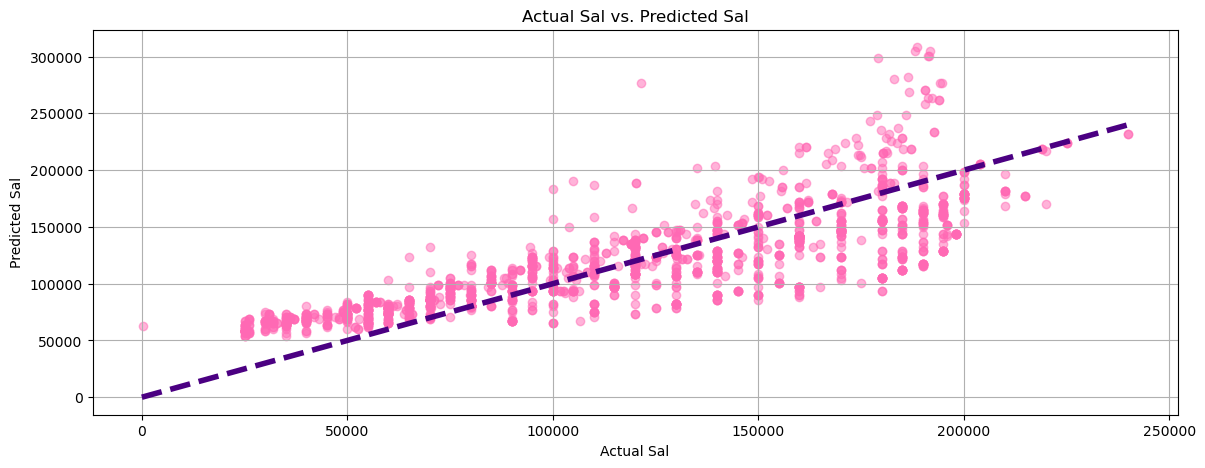

In [104]:
plt.figure(figsize=(14, 5))
plt.scatter(y_test, yp_1, alpha=0.5, color='hotpink')
plt.xlabel("Actual Sal")
plt.ylabel("Predicted Sal")
plt.title("Actual Sal vs. Predicted Sal")
plt.grid(True)

plt.plot([0, max(y_test)], [0, max(y_test)], color='indigo', linestyle='--', linewidth=4)

plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
## r2 and rsme score, exp 1
rmse1 = mean_squared_error(y_test, yp_1, squared=False)
r2_1 = r2_score(y_test, yp_1)
print(rmse1)
print(r2_1)

30615.11884905087
0.6614709747353801


## Exp 2 - Age, Exp, Edu

In [108]:
df_exp2 = df_exp2.drop(columns=['Occupation', 'Sex'])

In [109]:
y = df_exp2['Salary']

In [110]:
X = df_exp2.drop(columns=['Salary'])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [112]:
m2 = LinearRegression()
m2.fit(X_train, y_train)

LinearRegression()

In [115]:
yp_2 = m2.predict(X_test)

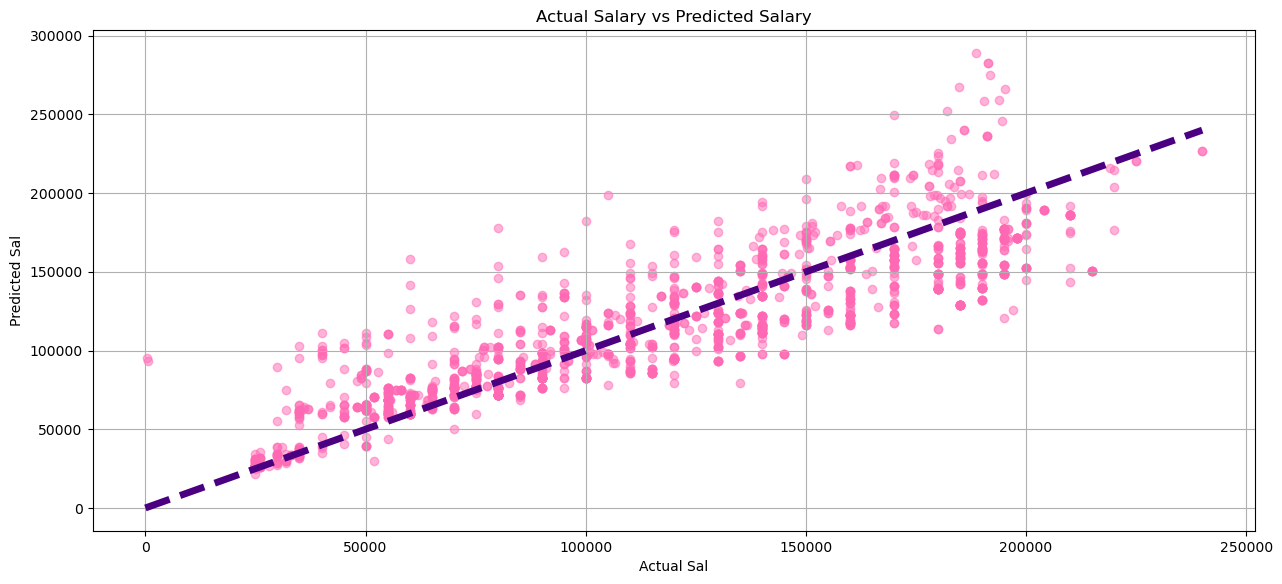

In [116]:
plt.figure(figsize=(15, 6.5))
plt.scatter(y_test, yp_2, alpha=0.5, color='hotpink')
plt.xlabel("Actual Sal")
plt.ylabel("Predicted Sal")
plt.title("Actual Salary vs Predicted Salary")
plt.grid(True)

plt.plot([0, max(y_test)], [0, max(y_test)], color='indigo', linestyle='--', linewidth=5)

plt.show()

In [118]:
## r2 and rsme score, exp 2
rmse2 = mean_squared_error(y_test, yp_2, squared=False)
rmse2

25779.92375343045

In [119]:
r2_2 = r2_score(y_test, yp_2)
r2_2

0.7583062732454143

## Radnom Forest Regression Model

In [188]:
## changing each column to binary using dummies
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)

In [189]:
df = pd.get_dummies(df, columns=['Education'], drop_first=False)

In [194]:
df = pd.get_dummies(df, columns=['Occupation'], drop_first=False)

In [195]:
## random forest regressor !
from sklearn.ensemble import RandomForestRegressor

In [196]:
y = df['Salary']
X = df.drop(columns=['Salary'])

In [197]:
df

,Age,Experience,Salary,Sex_Female,Sex_Male,Education_Bachelor's,Education_Bachelor's Degree,Education_High School,Education_Master's,Education_Master's Degree,...,Occupation_Supply Chain Manager,Occupation_Technical Recruiter,Occupation_Technical Support Specialist,Occupation_Technical Writer,Occupation_Training Specialist,Occupation_UX Designer,Occupation_UX Researcher,Occupation_VP of Finance,Occupation_VP of Operations,Occupation_Web Developer
0,32,5.0,90000,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,3.0,65000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45,15.0,150000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36,7.0,60000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,20.0,200000,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49,20.0,200000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700,32,3.0,50000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6701,30,4.0,55000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6702,46,14.0,140000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## fitting model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

In [224]:
model.score(X_test, y_test)

0.9822919087103679

In [ ]:
y_pred_exp3 = model.predict(X_test)

In [223]:
 ## rsme exp 3
rmse_exp3 = mean_squared_error(y_test, y_pred_exp3, squared=False)

rmse_exp3

7014.928138547018

In [200]:
## r2 exp3
r2_exp3 = r2_score(y_test, y_pred_exp3)

In [201]:
r2_exp3

0.9822919087103679